In [1]:
import glob
import os
import sys
sys.path.insert(1, '/media/yuan/yata/MIND/MIND-master/')

# data visualization
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.stats import pearsonr

from nibabel.freesurfer.mghformat import load
# np.seterr(all='raise')

## 回顾
不同计算方法得出的 **脑区间 MIND 值** 的稳定性（选用 aparc 进行分区）  

In [9]:
from scipy.stats import pearsonr

sub_list = []
for sub in comb_MIND.columns:
    if (sub[:3] != 'vol') and (sub[:3] != 'T1_') and sub[-1] == '1':
        sub = sub[:3] 
        sub_list.append(sub)  

r_series = []
vol_r_series = []
T1_r_series = []

for sub in sub_list:
    r = pearsonr(comb_MIND[sub + 'S1'],comb_MIND[sub + 'S2'])[0]
    vol_r = pearsonr(comb_MIND['vol_' + sub + 'S1'],comb_MIND['vol_' + sub +'S2'])[0]
    T1_r = pearsonr(comb_MIND['T1_' + sub + 'S1'],comb_MIND['T1_' + sub +'S2'])[0]
    r_series.append(r)
    vol_r_series.append(vol_r)
    T1_r_series.append(T1_r)

comb_MIND_r = np.array([r_series, vol_r_series, T1_r_series])
comb_MIND_r = pd.DataFrame(comb_MIND_r, columns=sub_list, index=['vertex_based MIND r:', 'voxel_based MIND r:', 'T1 MIND r:'] )
comb_MIND_r

,008,010,011,012,013,014,015,016,018,022
vertex_based MIND r:,0.861449,0.856449,0.903934,0.898705,0.745548,0.877796,0.862973,0.646860,0.840924,0.895438
voxel_based MIND r:,0.867829,0.848304,0.896845,0.888893,0.746978,0.889174,0.866162,0.614671,0.859210,0.895563
T1 MIND r:,0.984912,0.988530,0.973577,0.976974,0.970019,0.974486,0.982198,0.982773,0.963674,0.981642


## 原始数据（MPM）稳定性
### 工作流
- 试次内配准：MPM-T1w bbregister 
- 被试内配准：S2—S1（T1w）mri_robust_register
> 结果：与 S1 T1w img 配准的 S1 S2 的 MPM 和 parcellation
- 从 parcellation 中分离各脑区 mri_extract_label
- 对 S1 S2 的 脑区 label 取交集
- 使用上述 脑区 label 从 MPM 中提取数据
> 结果：在指定分区中体素水平上一一对应的 S1 S2 MPM 数据
- 稳定性分析

### 结果（基于 aseg 分为大脑皮层，大脑白质）
#### 变异系数 COV

In [5]:
MPM_COV_aseg = pd.read_csv('/media/yuan/yata/MIND/raw_data/test_retest/aseg/MPM_COV_aseg.csv', index_col=0)

array([<Axes: title={'center': 'Cerebral-Cortex'}, xlabel='[Param]'>,
       <Axes: title={'center': 'Cerebral-White-Matter'}, xlabel='[Param]'>],
      dtype=object)

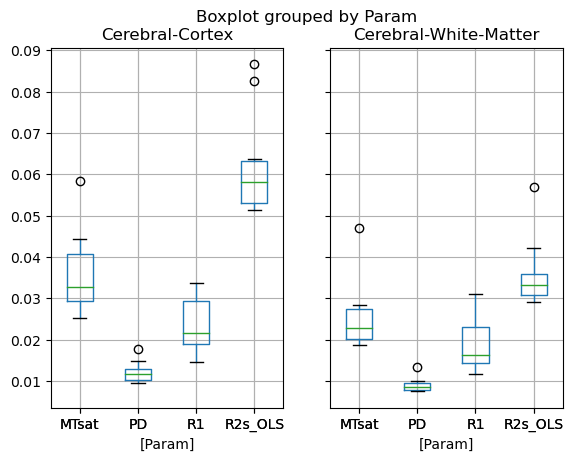

In [6]:
MPM_COV_aseg.drop('Sub', axis=1).boxplot(by=['Param'])

#### 相关系数 r

In [2]:
MPM_r_aseg = pd.read_csv('/media/yuan/yata/MIND/raw_data/test_retest/aseg/MPM_r_aseg.csv', index_col=0)

In [3]:
MPM_r_aseg

,Cerebral-Cortex,Cerebral-White-Matter,Sub,Param
0,0.814867,0.869457,13,MTsat
1,0.925087,0.930701,11,MTsat
2,0.866693,0.891641,15,MTsat
3,0.937016,0.939418,10,MTsat
4,0.897110,0.902839,12,MTsat
5,0.898311,0.905612,22,MTsat
6,0.757929,0.661331,16,MTsat
7,0.876357,0.900012,14,MTsat
8,0.928665,0.928699,18,MTsat
9,0.907883,0.909775,8,MTsat


array([<Axes: title={'center': 'Cerebral-Cortex'}, xlabel='[Param]'>,
       <Axes: title={'center': 'Cerebral-White-Matter'}, xlabel='[Param]'>],
      dtype=object)

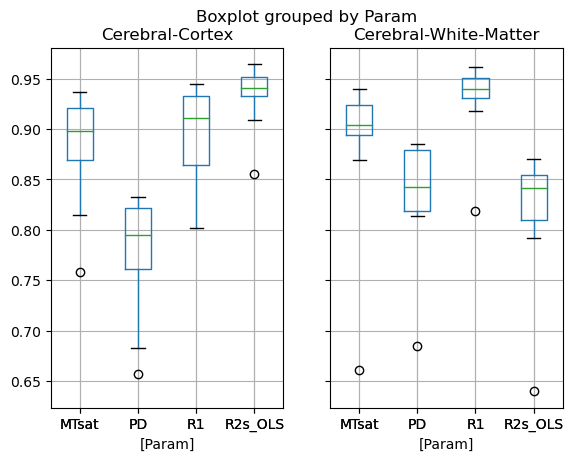

In [64]:
MPM_r_aseg.drop('Sub', axis=1).boxplot(by=['Param'])

In [28]:
MPM_r_aseg = MPM_r_aseg.groupby(['Param'])

In [30]:
MPM_r_aseg_sub['Cerebral-Cortex'].describe()

,count,mean,std,min,25%,50%,75%,max
Param,,,,,,,,
MTsat,10.0,0.880992,0.056156,0.757929,0.869109,0.897711,0.920786,0.937016
PD,10.0,0.776885,0.061607,0.656895,0.761122,0.794538,0.821848,0.832186
R1,10.0,0.896735,0.046277,0.801706,0.864610,0.910543,0.932948,0.944610
R2s_OLS,10.0,0.933278,0.031573,0.854943,0.932705,0.940956,0.951744,0.964305


In [32]:
MPM_r_aseg_sub['Cerebral-White-Matter'].describe()

,count,mean,std,min,25%,50%,75%,max
Param,,,,,,,,
MTsat,10.0,0.883948,0.080859,0.661331,0.893734,0.904225,0.923968,0.939418
PD,10.0,0.833977,0.059360,0.684847,0.818460,0.842372,0.878675,0.885065
R1,10.0,0.929573,0.040925,0.818755,0.930590,0.939806,0.950666,0.960958
R2s_OLS,10.0,0.818432,0.067487,0.639701,0.809881,0.841007,0.854039,0.869800
